<a href="https://colab.research.google.com/github/saptarshidatta96/House-Prices/blob/master/House_Price_Prediction_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Importing Python Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
plt.style.use('classic')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing Training and Test Data

In [3]:
train = pd.read_csv('/content/gdrive/My Drive/house-prices/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/house-prices/test.csv')
print(train.head())
#print(train.columns.value_counts())
print(train.shape)
print(test.shape)

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]
(1460, 81)
(1459, 80)


##Overview

There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

Let's have a look at the **Target** Variable

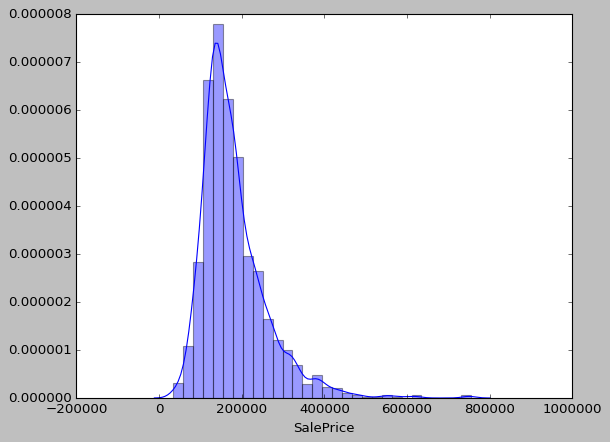

In [4]:
sns.distplot(train['SalePrice'], bins = 30)

Let's examine the numeric features in the data

In [5]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
numeric_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


1. Date Time Variables / Temporal Variables

In [7]:
date_feature = [feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]
print(date_feature)

for feature in date_feature:
  print(feature, train[feature].unique())

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000.

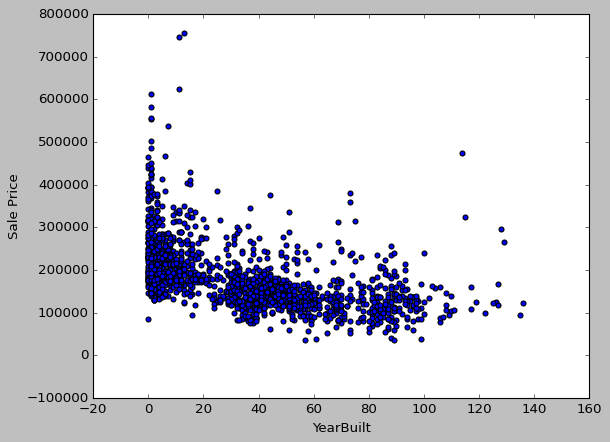

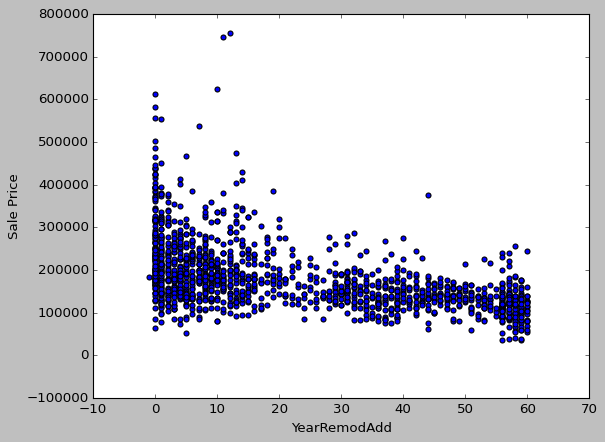

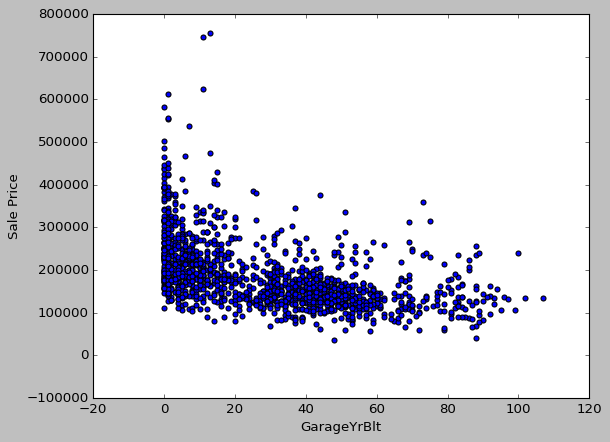

In [8]:
#plt.scatter(x = (train['YrSold'] - train['YearBuilt']), y = train['SalePrice'])

for feature in date_feature:
  if feature != 'YrSold':
    data = train.copy()
    plt.scatter(x = (data['YrSold'] - data[feature]), y = data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()


2. Numeric Variables - Dircrete Type

In [9]:
discrete_feature = [ feature for feature in numeric_features if len(train[feature].unique()) < 25 
                    and feature not in date_feature + ['Id']]

print(len(discrete_feature))

17


In [10]:
train[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


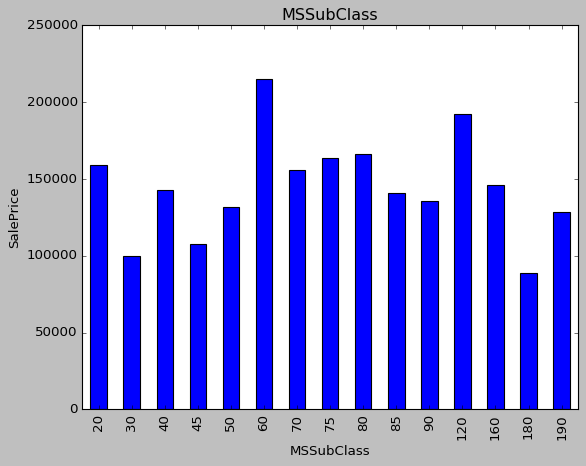

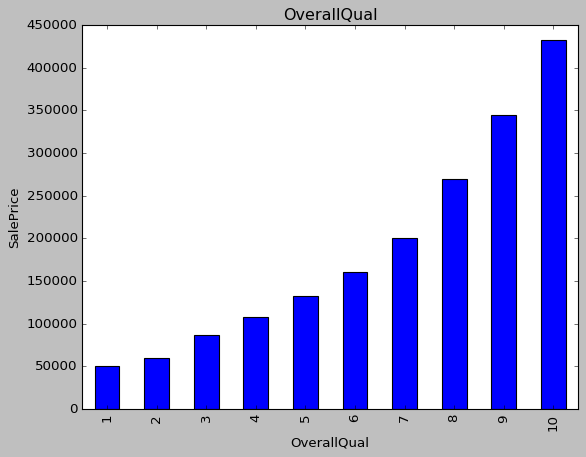

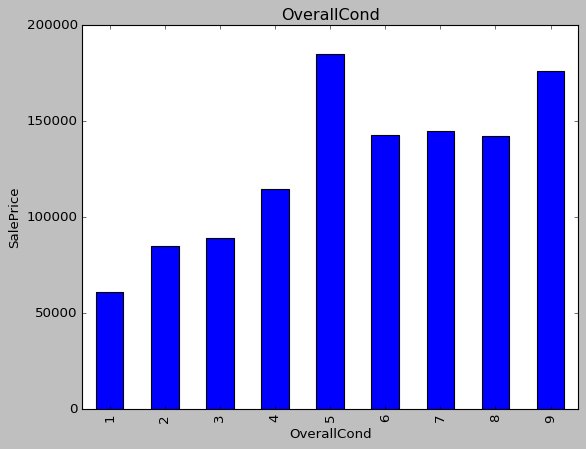

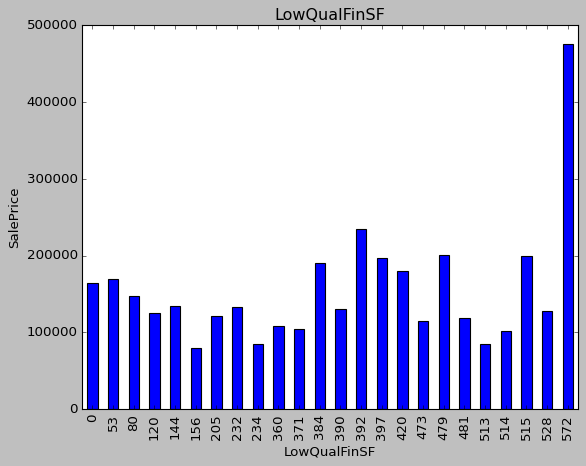

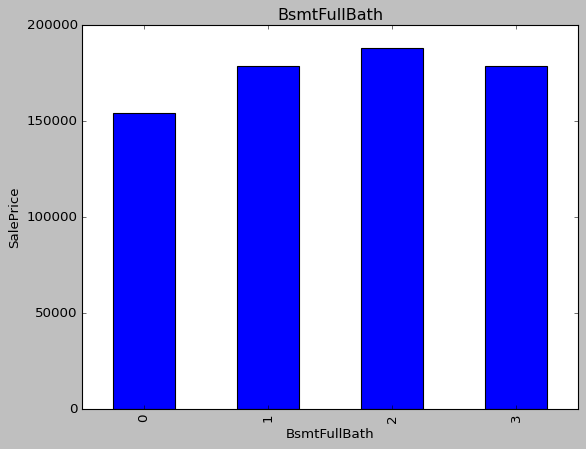

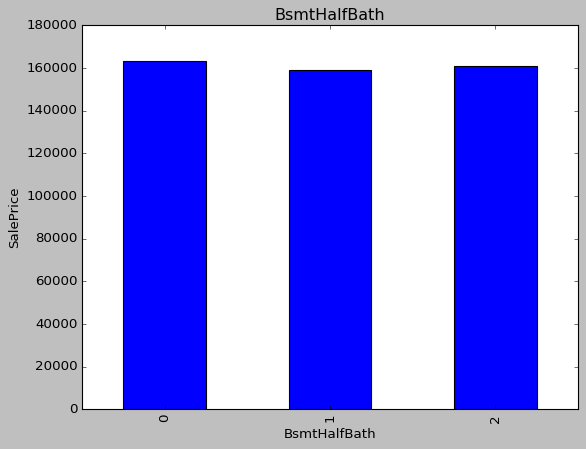

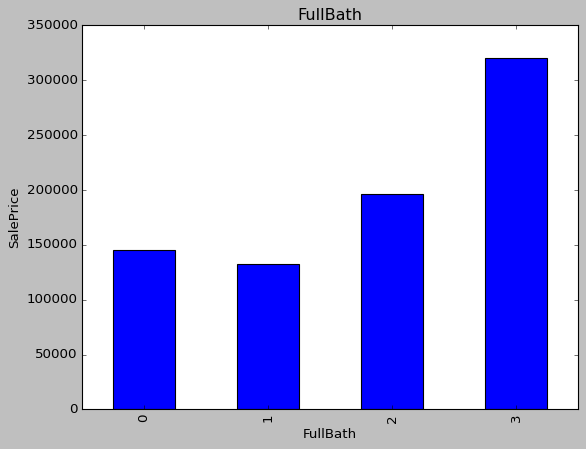

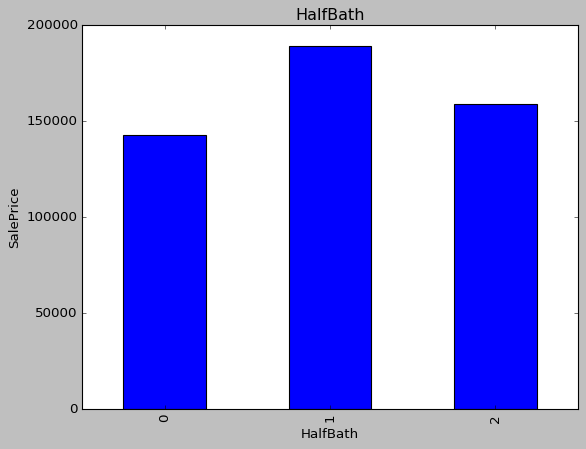

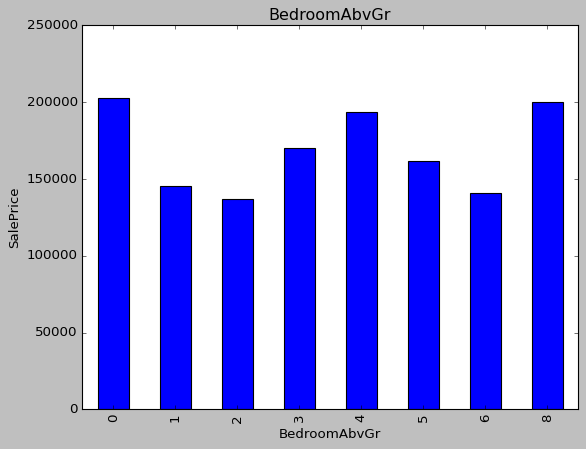

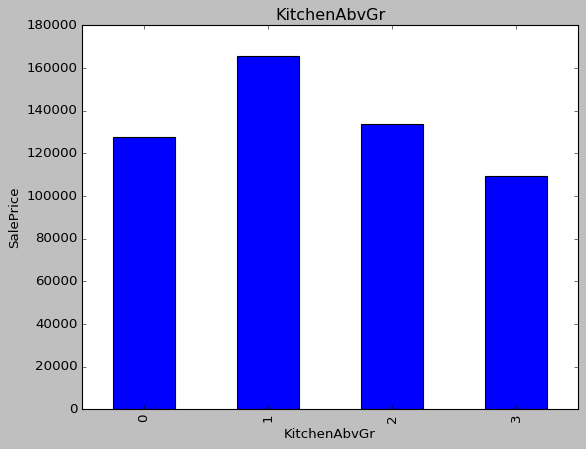

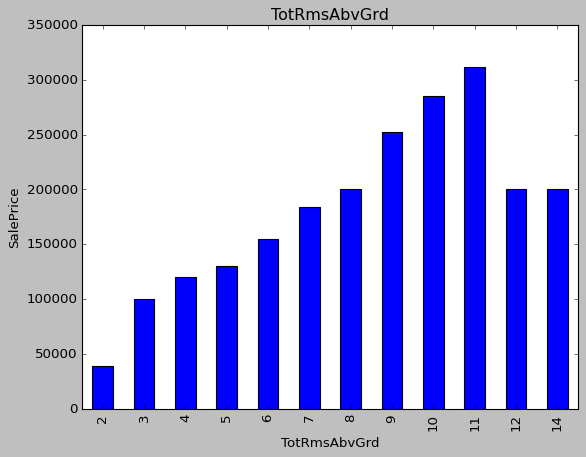

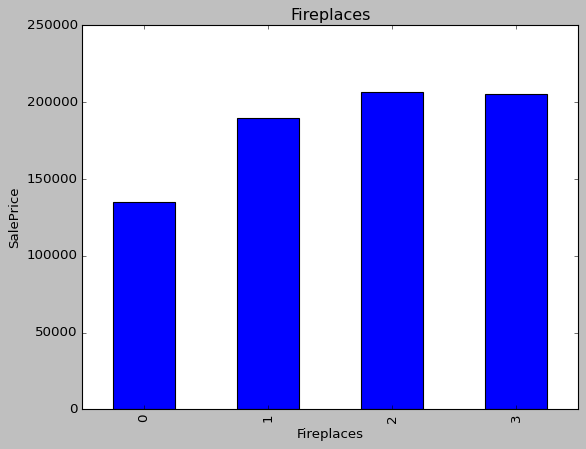

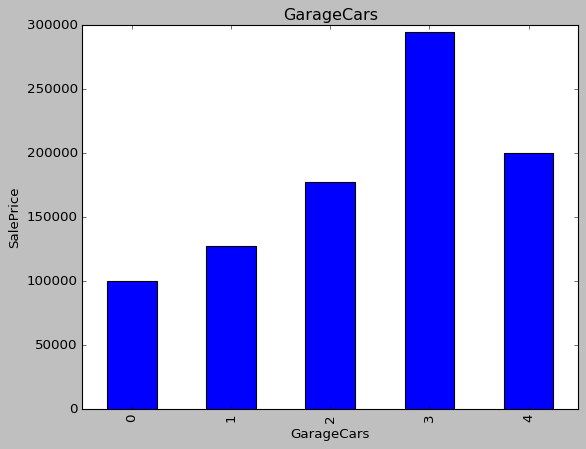

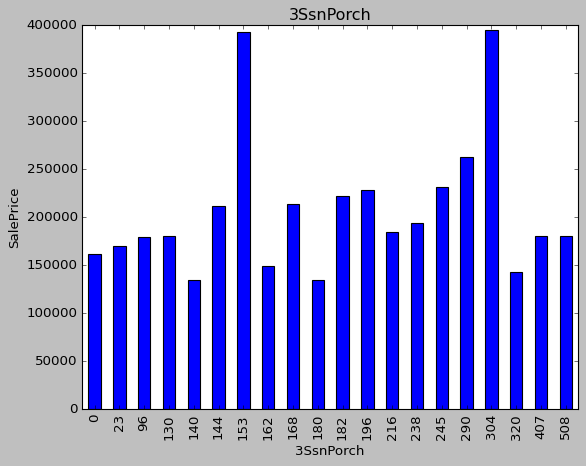

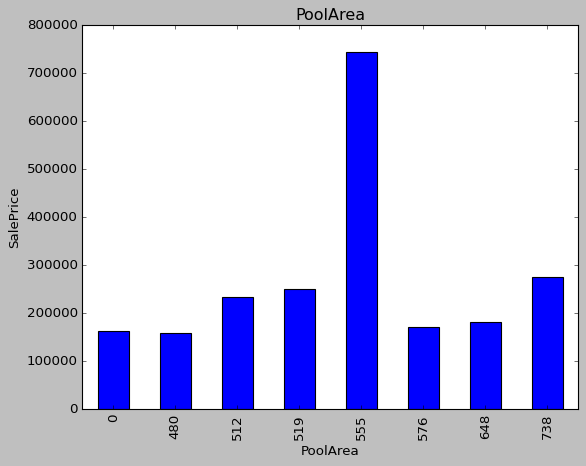

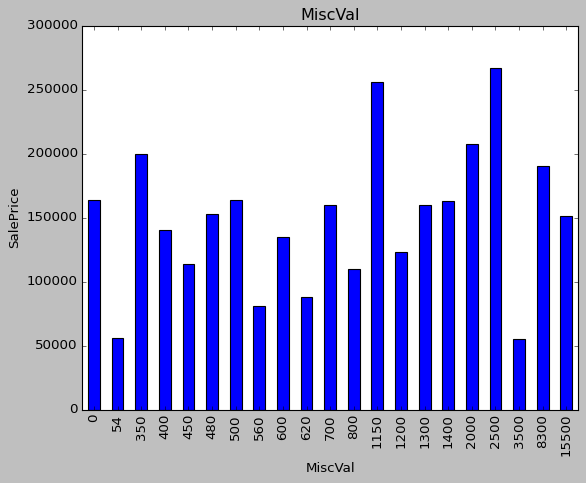

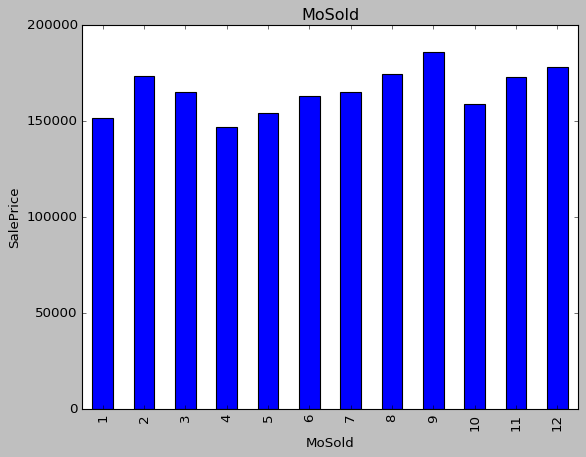

In [11]:
for feature in discrete_feature:
  data = train.copy(feature)
  data = data.groupby(feature)['SalePrice']
  data.median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

3. Continious Variables

In [12]:
continious_feature = [ feature for feature in numeric_features if feature not in date_feature + discrete_feature + ['Id']]
print(len(continious_feature))

16


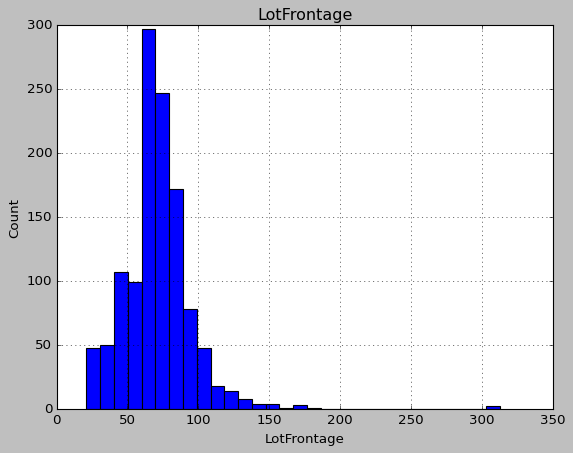

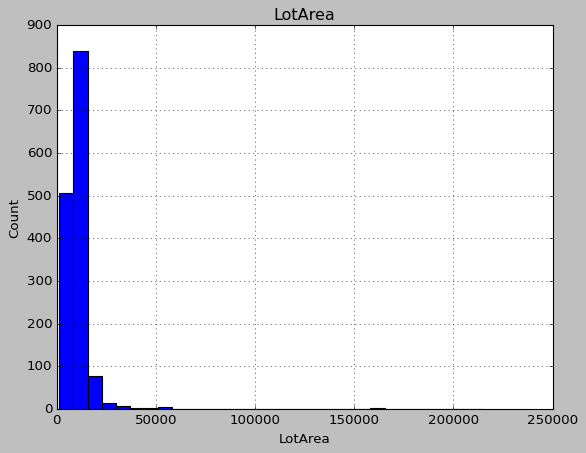

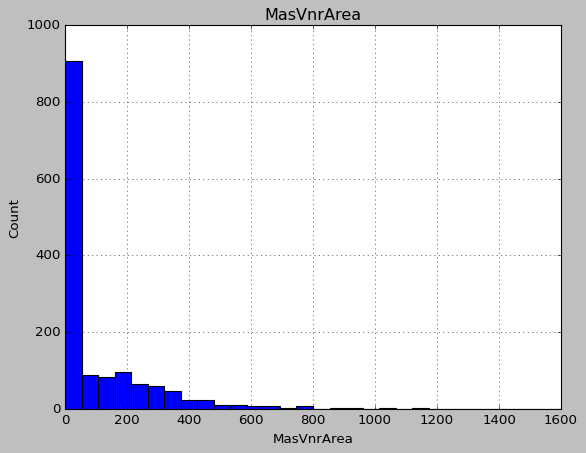

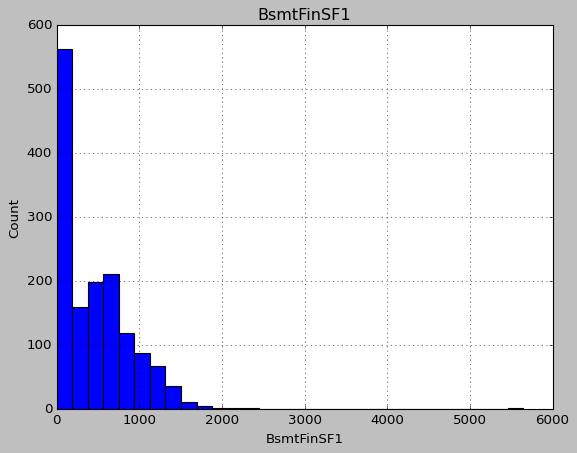

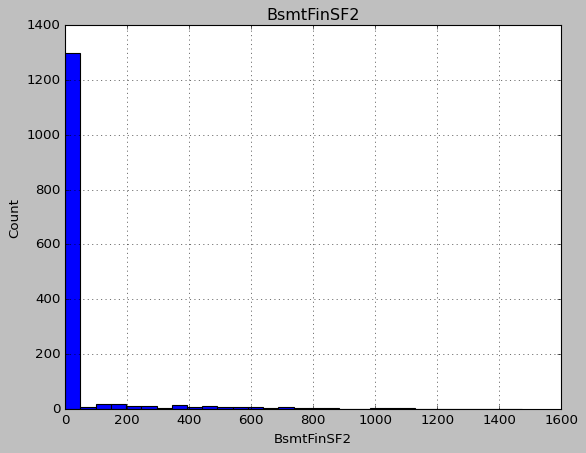

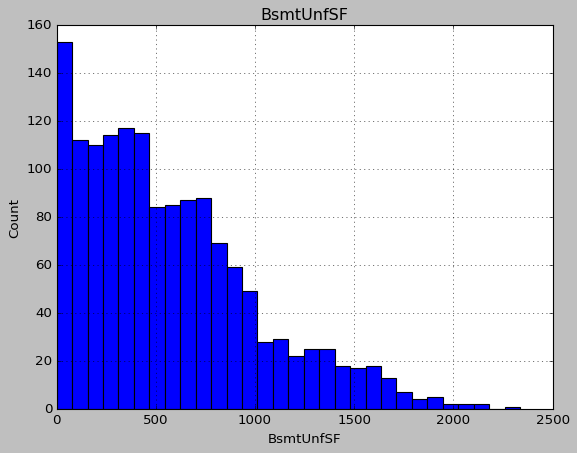

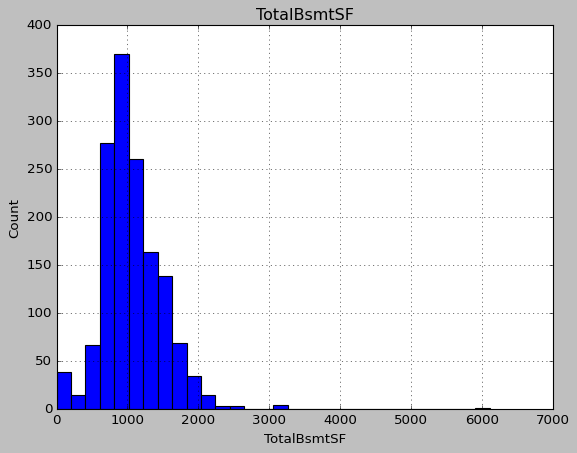

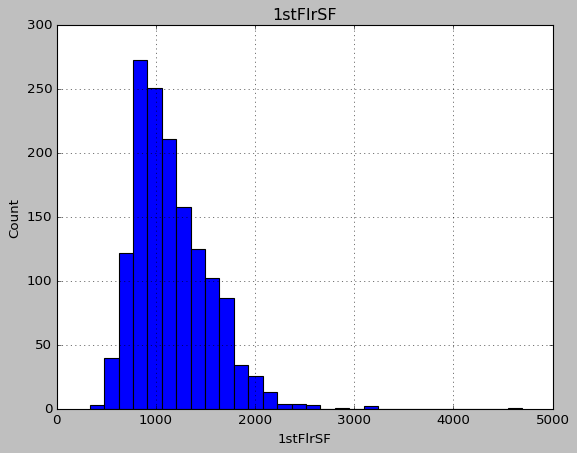

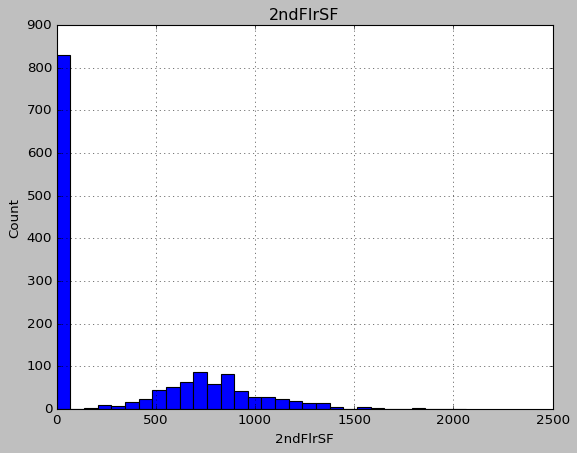

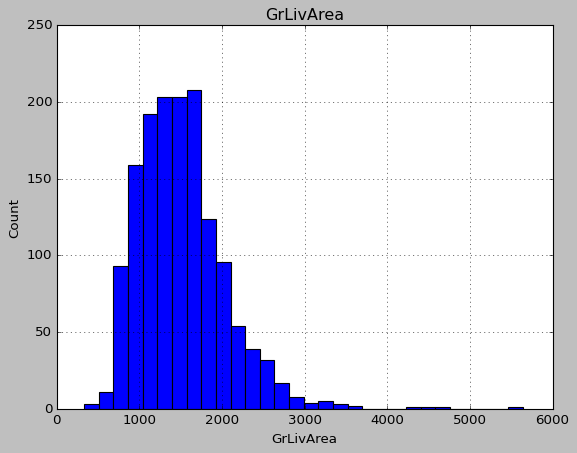

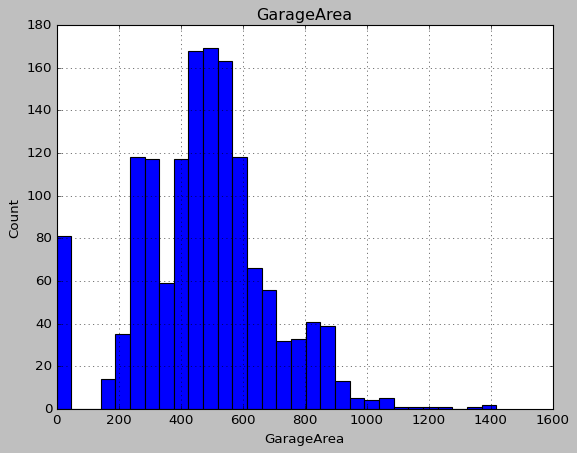

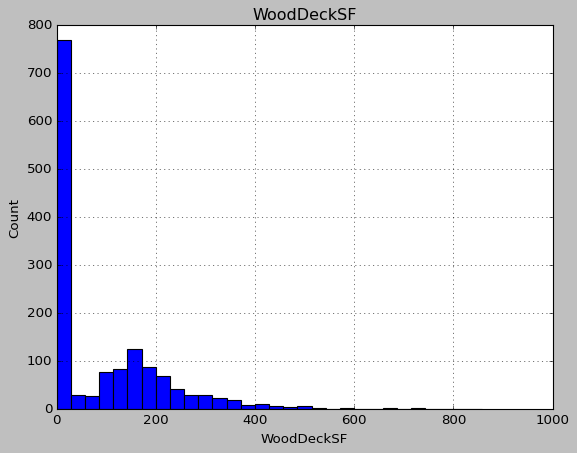

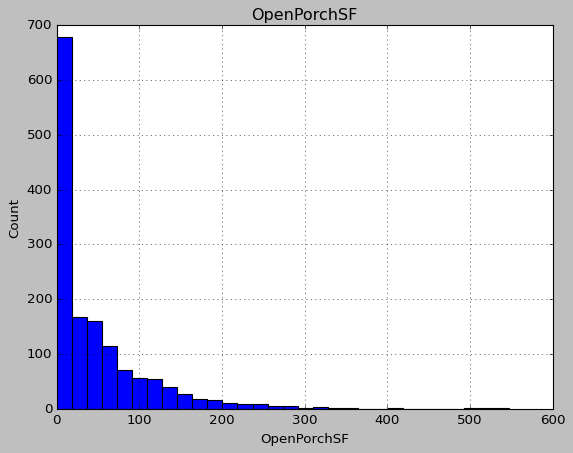

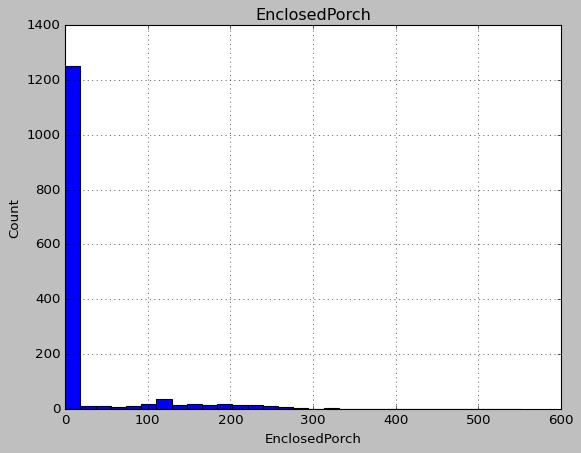

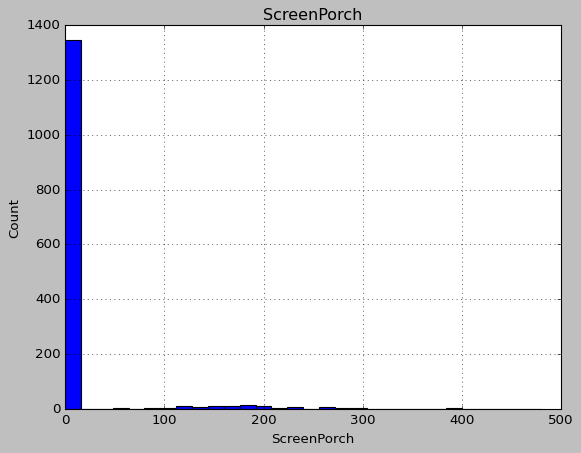

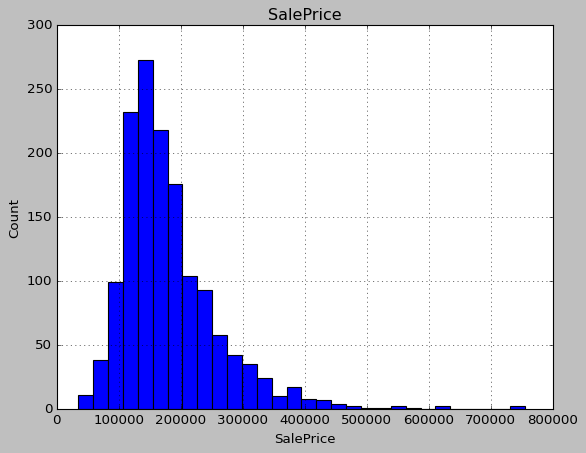

In [13]:
for feature in continious_feature:
  data = train.copy(feature)
  data[feature].hist(bins = 30)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()

Let us Examine the Catagorical Features

In [14]:
catagorical_features = train.select_dtypes(include = np.object)
catagorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Now, lets work with the missing values in our data.

In [15]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We should drop PoolQC, MiscFeature, Alley, Fence, FireplaceQu	as these variables contain huge missing data( more than 80%).

The only case that it may worth deleting a variable is when its missing values are more than 60% of the observations but only if that variable is insignificant.Taking this into consideration, imputation is always a preferred choice over deleting variables.

In [16]:
df = train
# Keep only the rows with at least 4 non-na values
df.dropna(axis =1 ,inplace = True, thresh = 300)

print('No. of Columns:' +str(len(df.columns)))

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

#We dropped Four Columns

print('No of rows:' +str(len(df)))

No. of Columns:77
              Total   Percent
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
GarageCond       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrType        8  0.005479
MasVnrArea        8  0.005479
Electrical        1  0.000685
RoofMatl          0  0.000000
RoofStyle         0  0.000000
SalePrice         0  0.000000
Exterior1st       0  0.000000
Exterior2nd       0  0.000000
No of rows:1460


In [17]:
# Will drop the rows only if all of the values in the row are missing
df.dropna(how = 'all',inplace = True)

print('No. of rows:' +str(len(df))) #No rows dropped as condition not satisfied

No. of rows:1460


In [18]:
df.dropna(how='any', subset=['MasVnrArea', 'MasVnrType', 'Electrical'], inplace = True)
print('No. of rows:' +str(len(df)))

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

No. of rows:1451
              Total   Percent
FireplaceQu     685  0.472088
LotFrontage     257  0.177119
GarageType       81  0.055824
GarageYrBlt      81  0.055824
GarageFinish     81  0.055824
GarageCond       81  0.055824
GarageQual       81  0.055824
BsmtExposure     38  0.026189
BsmtFinType2     38  0.026189
BsmtFinType1     37  0.025500
BsmtCond         37  0.025500
BsmtQual         37  0.025500
RoofMatl          0  0.000000
YearRemodAdd      0  0.000000
RoofStyle         0  0.000000
Exterior2nd       0  0.000000
Exterior1st       0  0.000000
OverallCond       0  0.000000
MasVnrType        0  0.000000
MasVnrArea        0  0.000000


In [58]:
catagorical_features = df.select_dtypes(include = np.object)
catagorical_features.columns

Index(['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [20]:
for feature in catagorical_features:
  df.fillna('U', inplace = True)

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

              Total  Percent
SalePrice         0      0.0
ExterCond         0      0.0
RoofStyle         0      0.0
RoofMatl          0      0.0
Exterior1st       0      0.0
Exterior2nd       0      0.0
MasVnrType        0      0.0
MasVnrArea        0      0.0
ExterQual         0      0.0
Foundation        0      0.0
TotalBsmtSF       0      0.0
BsmtQual          0      0.0
BsmtCond          0      0.0
BsmtExposure      0      0.0
BsmtFinType1      0      0.0
BsmtFinSF1        0      0.0
BsmtFinType2      0      0.0
BsmtFinSF2        0      0.0
YearRemodAdd      0      0.0
YearBuilt         0      0.0


In [21]:
numeric_features = df.select_dtypes(include=[np.number])

In [22]:
date_feature = [feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]

for feature in date_feature:
  df[feature].fillna(df[feature].mode()[0],inplace=True)

In [23]:
discrete_feature = [ feature for feature in numeric_features if len(train[feature].unique()) < 25 
                    and feature not in date_feature + ['Id']]

for feature in date_feature:
  df[feature].fillna(df[feature].mode()[0],inplace=True)

In [24]:
continious_feature = [ feature for feature in numeric_features if feature not in date_feature + discrete_feature + ['Id']]

for feature in continious_feature:
  df[feature].fillna(df[feature].mean(),inplace=True)


In [25]:
print('No. of rows:' +str(len(df)))
print('No. of columns:' +str(len(df.columns)))

No. of rows:1451
No. of columns:77


Heat Map

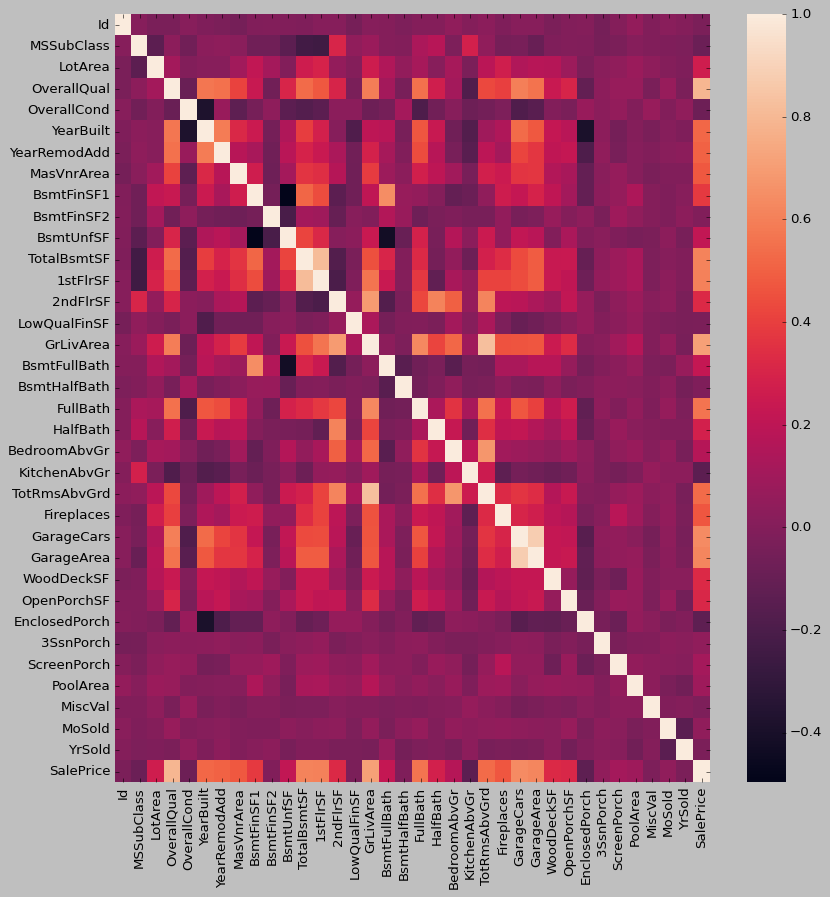

In [26]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

correlation = df.corr()

Zoomed Heat Map

In [27]:
k= 11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


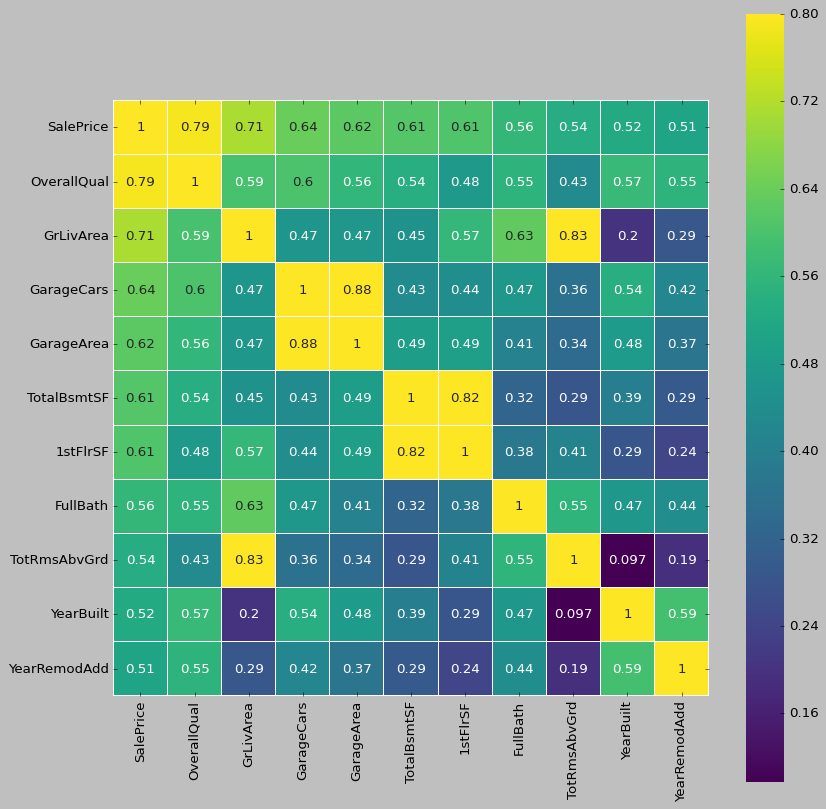

In [28]:
plt.figure(figsize = (12,12))

sns.heatmap(df[cols].corr(), vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white")
  

From above zoomed heatmap it is observed that GarageCars & GarageArea are closely correlated . Similarly TotalBsmtSF and 1stFlrSF are also closely correlated.

My observations :

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.

'GarageCars' and 'GarageArea' are strongly correlated variables. It is because the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. So it is hard to distinguish between the two. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

'TotalBsmtSF' and '1stFloor' also seem to be twins. In this case let us keep 'TotalBsmtSF'
'TotRmsAbvGrd' and 'GrLivArea', twins

'YearBuilt' it appears like is slightly correlated with 'SalePrice'. This requires more analysis to arrive at a conclusion may be do some time series analysis.

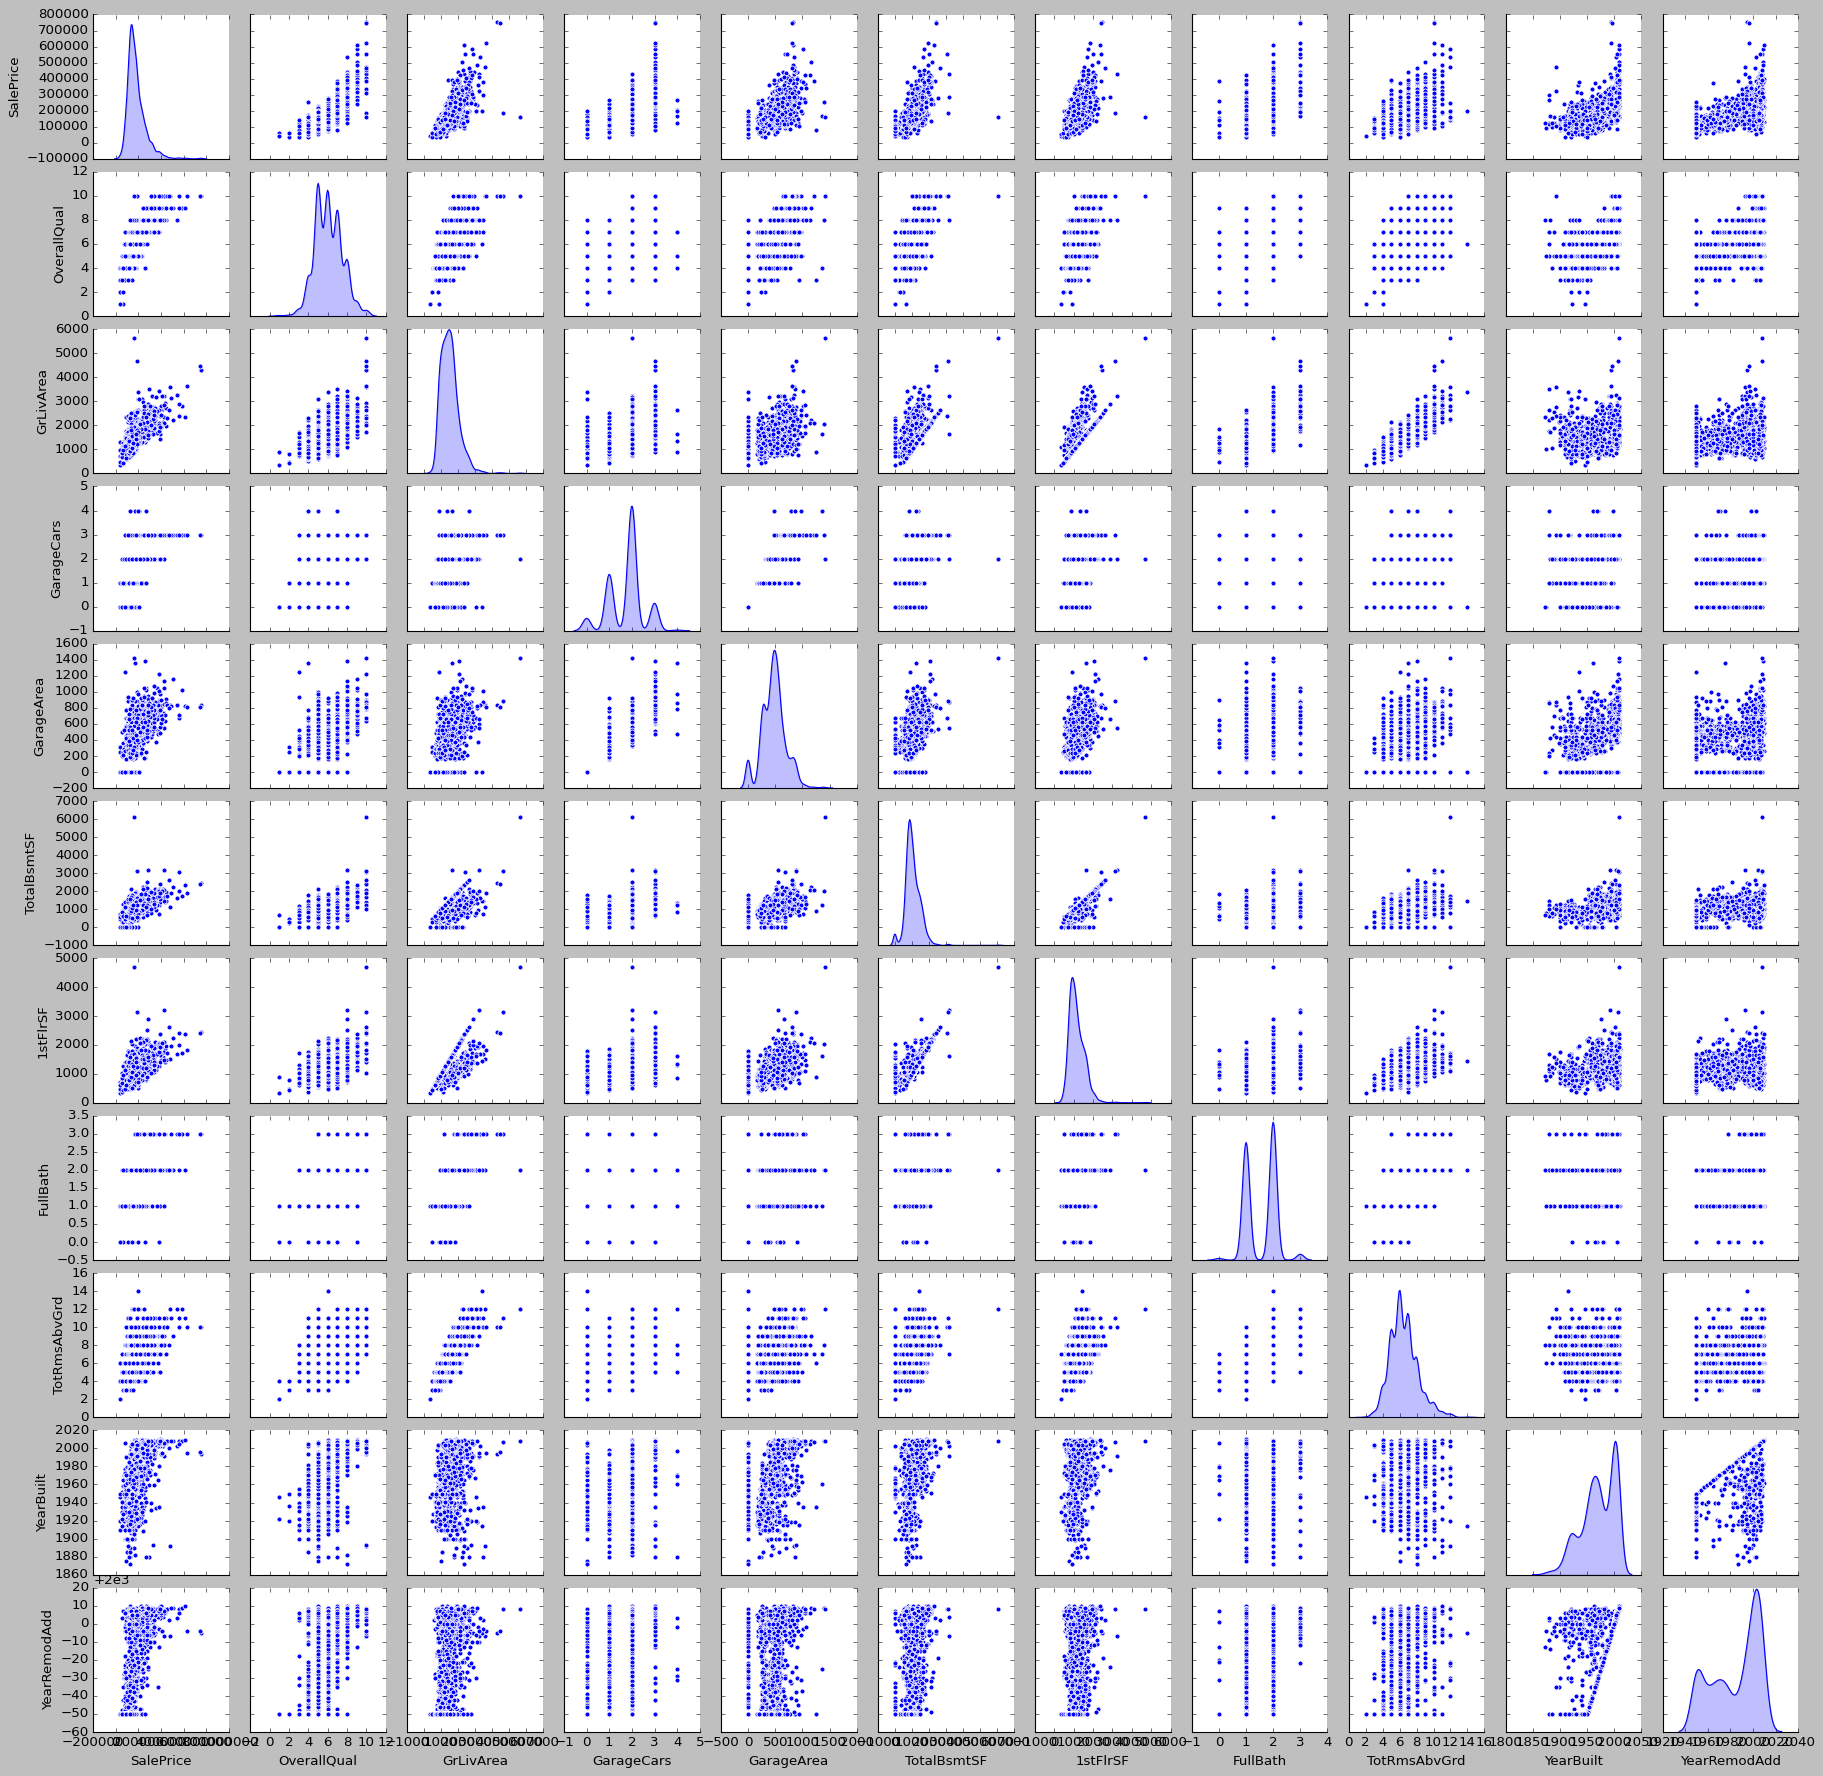

In [29]:
sns.pairplot(df[cols], height = 2, diag_kind='kde')
plt.show()

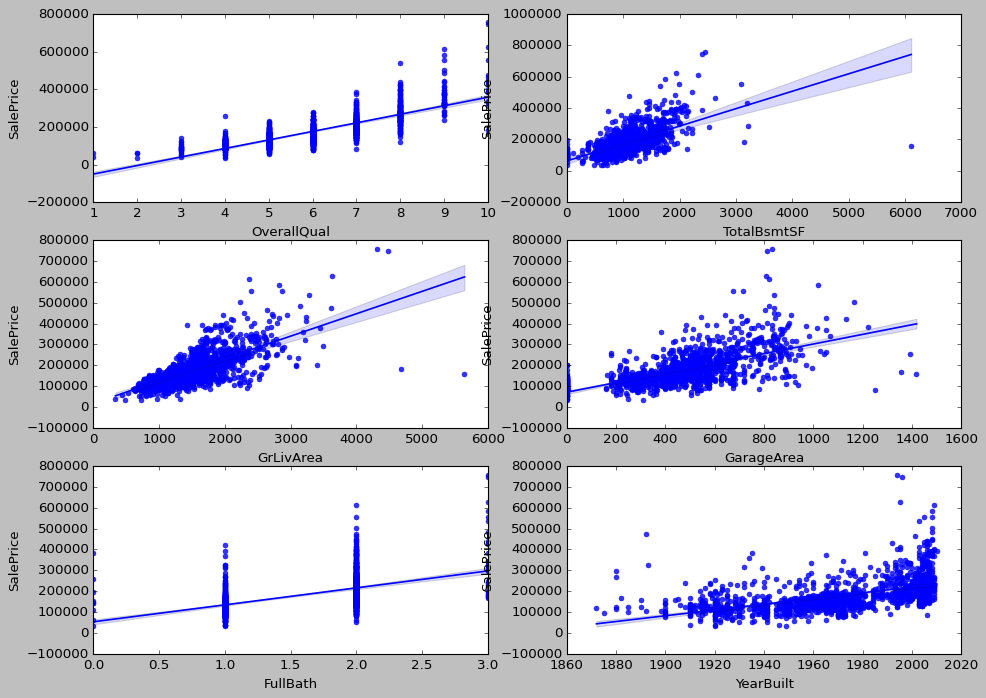

In [44]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
OverallQual_scatter_plot = pd.concat([train['SalePrice'],train['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([train['SalePrice'],train['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
GrLivArea_scatter_plot = pd.concat([train['SalePrice'],train['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
GarageArea_scatter_plot = pd.concat([train['SalePrice'],train['GarageArea']],axis = 1)
sns.regplot(x='GarageArea',y = 'SalePrice',data = GarageArea_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
FullBath_scatter_plot = pd.concat([train['SalePrice'],train['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearBuilt_scatter_plot = pd.concat([train['SalePrice'],train['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

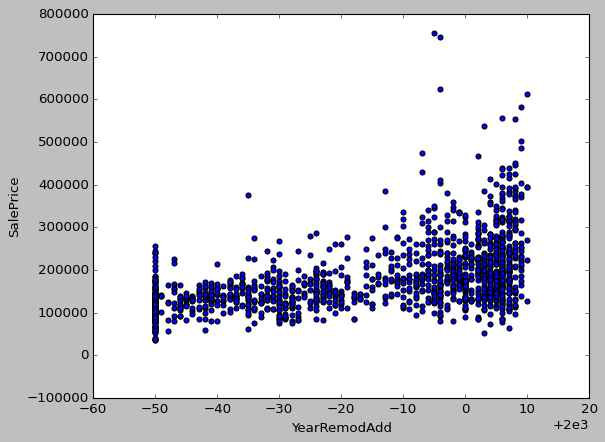

In [45]:
YearRemodAdd_scatter_plot = pd.concat([train['SalePrice'],train['YearRemodAdd']],axis = 1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')

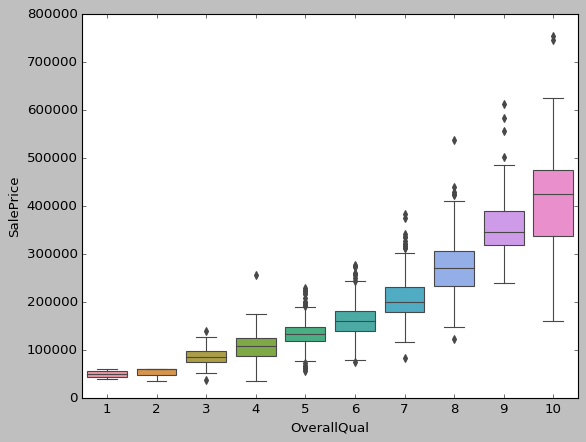

In [46]:
sns.boxplot(x='OverallQual', y="SalePrice", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

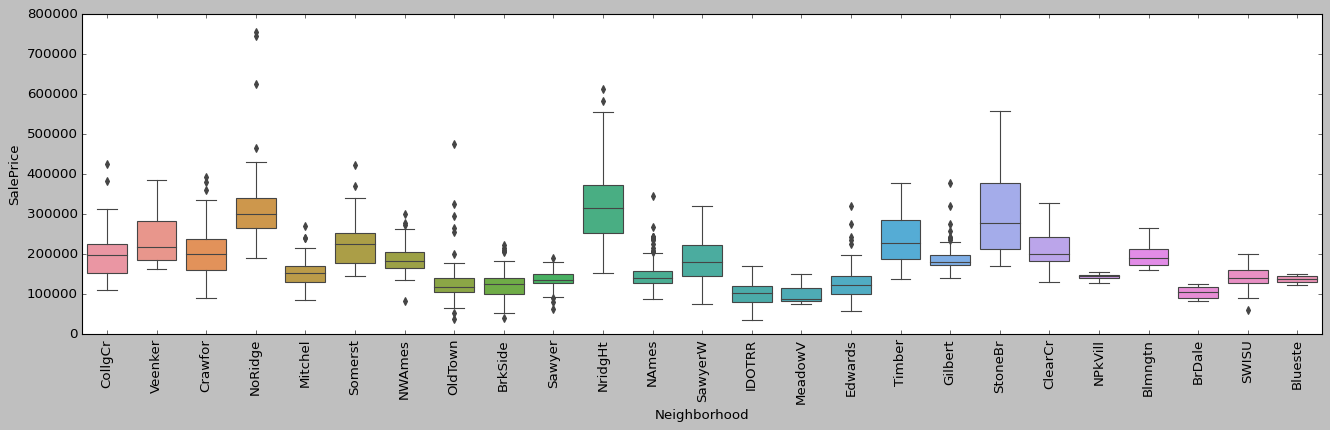

In [53]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Neighborhood', y="SalePrice", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

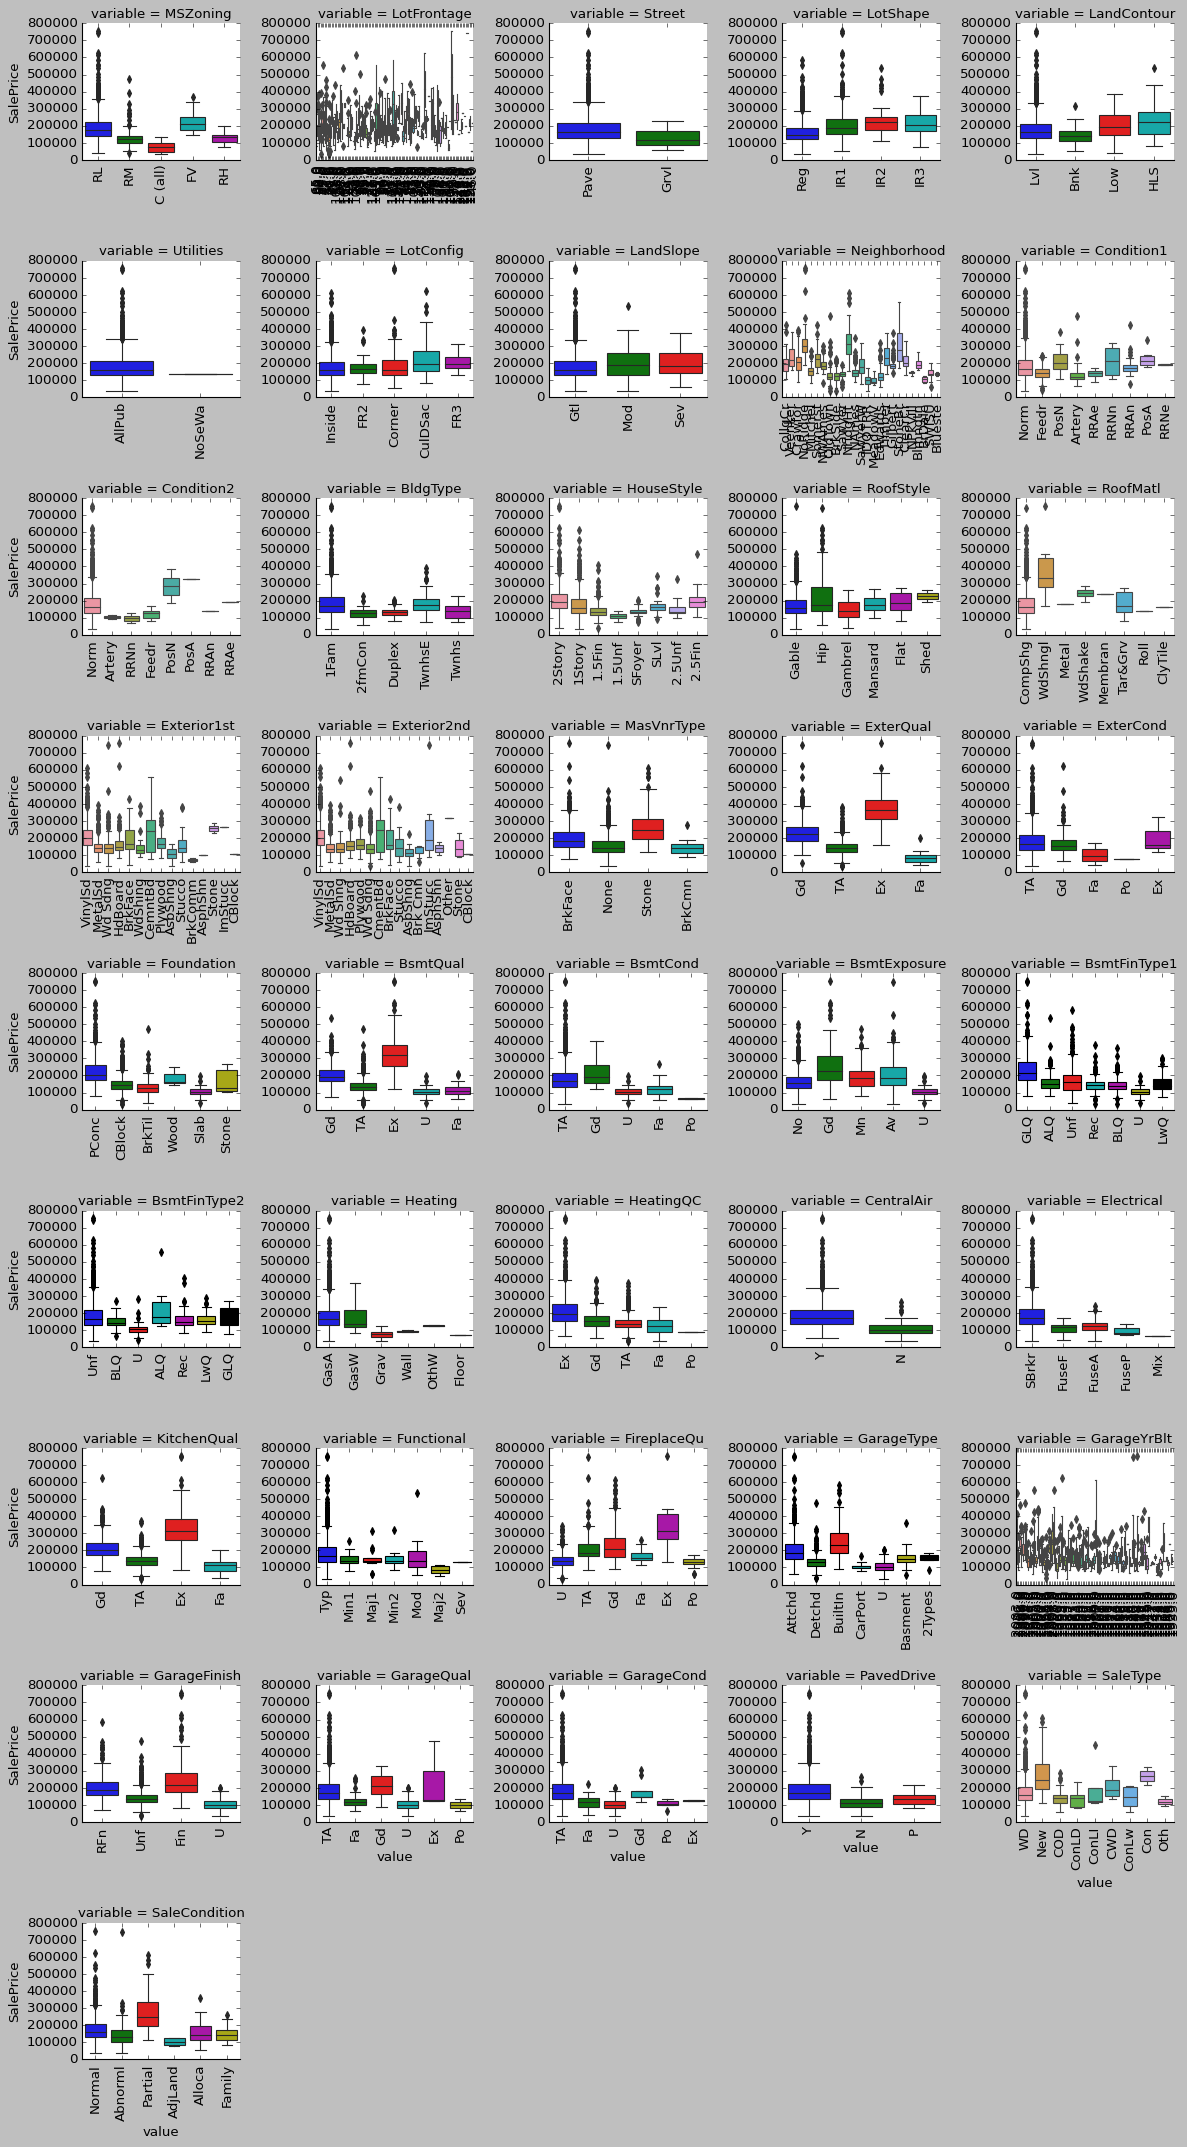

In [81]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)


f = pd.melt(df, id_vars=['SalePrice'], value_vars=catagorical_features)#check the output using f.head()
g = sns.FacetGrid(f, col="variable",  col_wrap=5,sharex=False, sharey=False)
g = g.map(boxplot, "value", "SalePrice")
plt.xticks(rotation=90)
#sns.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text major ticklabel objects>)

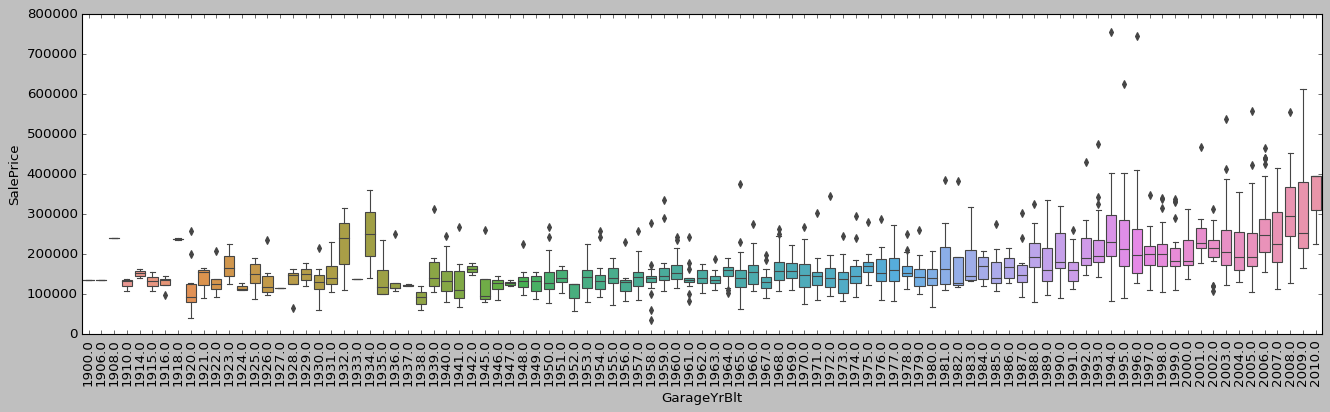

In [77]:
plt.figure(figsize=(20,5))
sns.boxplot(x='GarageYrBlt', y="SalePrice", data=data)
plt.xticks(rotation=90)